# Hyperparameter tuning

This notebook is used to illustrate the process that has been carried out to find the best hyperparameter settings for the network. The following hyperparameters are being tested:

*	**batch size, num_workers:** 4, 8 ,16, 32
*   **Learning rate threshold** $\mathbf{\mu}$: 1e-2, 1e-4, 1e-6, 1e-8, 1e-10
*   **Learning rate decay factor:** 0.5, 0.75, 0.95, 0.99
*   **Learning rate decay patience:** 1, 2, 4, 10
*   **Test for num_epochs:** 5000 epochs
*   **Ratio train/validation:** 80/20, 90/10


**Imports and mount Google Drive**

In [26]:
%matplotlib inline               
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import os
import re
from google.colab import drive
drive.mount('/content/gdrive')
path ='/content/gdrive/My Drive/deep_learning_group_7/Final/Hyperparameter_tuning'
os.chdir(path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Helper functions

In [0]:
def create_plots(hyperparam):
    val_psnr = []
    epoch_loss = []
    val_loss = []
    model = []
    nums = re.compile(r"\d+(?:\.\d+)?(?:[eE][+-]?\d+)?")

    folder = path+'/'+hyperparam
    files = os.listdir(folder)
    for file in files:
        if file.endswith('validation_psnr.npy'):
            val_psnr.append(file)
        elif file.endswith('epoch_loss_list.npy'):
            epoch_loss.append(file) 
        elif file.endswith('val_loss_list.npy'):
            val_loss.append(file) 
        elif file.endswith('model'):
            model.append(file) 
    val_psnr.sort()
    epoch_loss.sort()
    val_loss.sort()

    matplotlib.rcParams['figure.figsize'] = [30, 10]

    fig, axs = plt.subplots(1, 3)
    # fig.suptitle('Hyperparameter tuning for different {}'.format(hyperparam))

    # Validation PSNR

    for file in val_psnr:
        axs[0].plot(np.load(folder+'/'+file), label = nums.search(file).group(0))
    axs[0].set_xlabel('Number of Epochs', fontsize=20)
    axs[0].set_ylabel('Validation PSNR [dB]', fontsize=20)
    axs[0].legend(fontsize=20)

    # Epoch loss
    for file in epoch_loss:
        axs[1].plot(np.load(folder+'/'+file), label = nums.search(file).group(0))
    axs[1].set_xlabel('Number of Epochs', fontsize=20)
    axs[1].set_ylabel('Epoch loss', fontsize=20)
    axs[1].set_yscale('log')
    axs[1].legend(fontsize=20)

    # Validation loss
    plt.figure()
    for file in val_loss:
        axs[2].plot(np.load(folder+'/'+file), label = nums.search(file).group(0))
    axs[2].set_xlabel('Number of Epochs', fontsize=20)
    axs[2].set_ylabel('Validation loss', fontsize=20)
    axs[2].set_yscale('log')
    axs[2].legend(fontsize=20)

    plt.show()

### Batch size

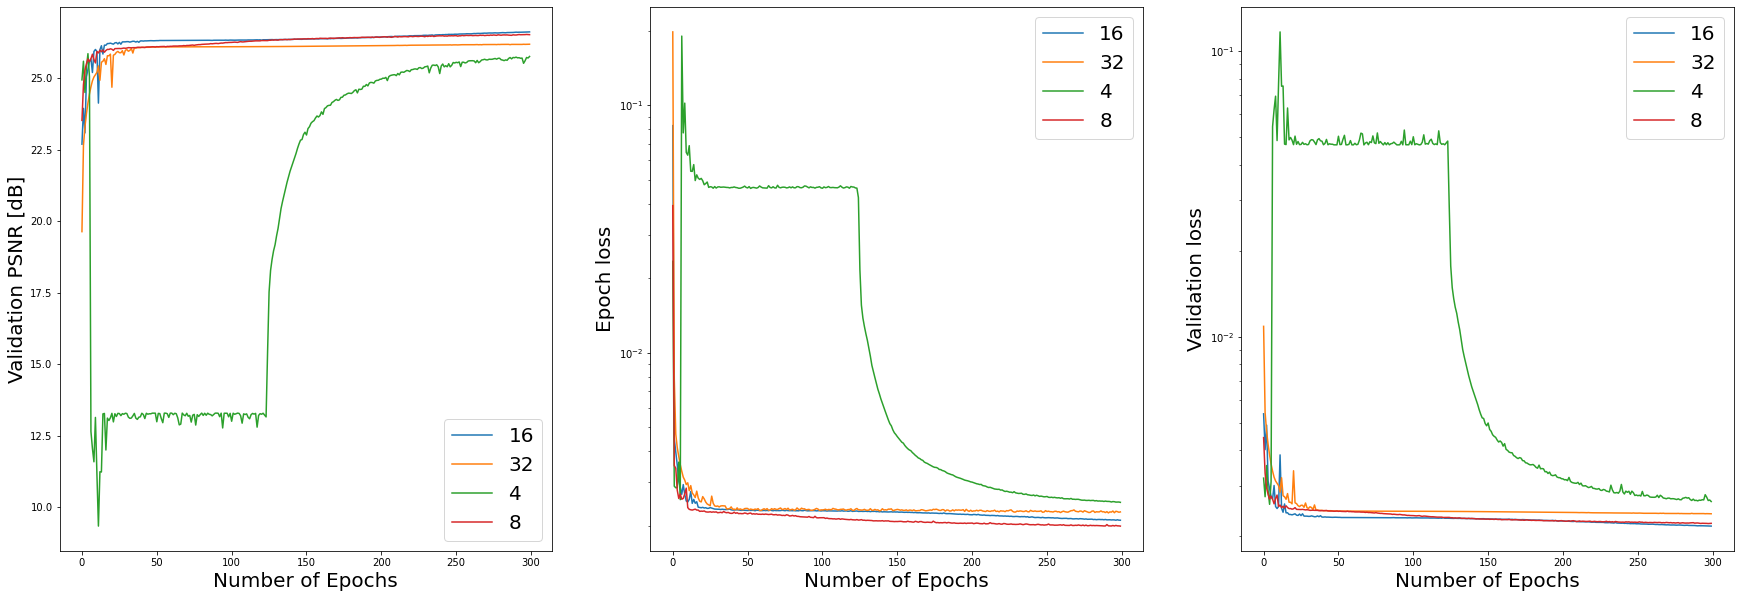

<Figure size 2160x720 with 0 Axes>

In [36]:
create_plots('batchsize')

### Learning rate threshold $\mu$:

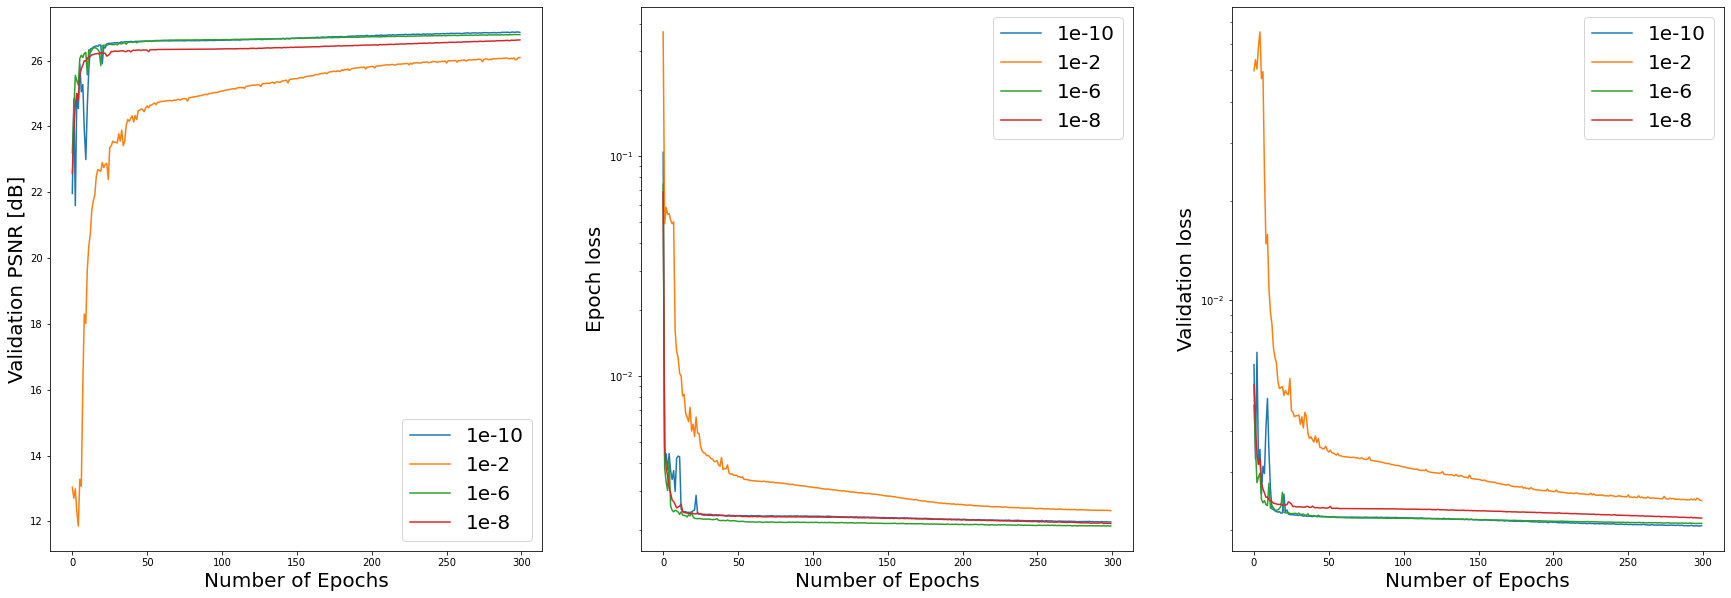

<Figure size 2160x720 with 0 Axes>

In [29]:
create_plots('mu')

### Learning rate decay factor

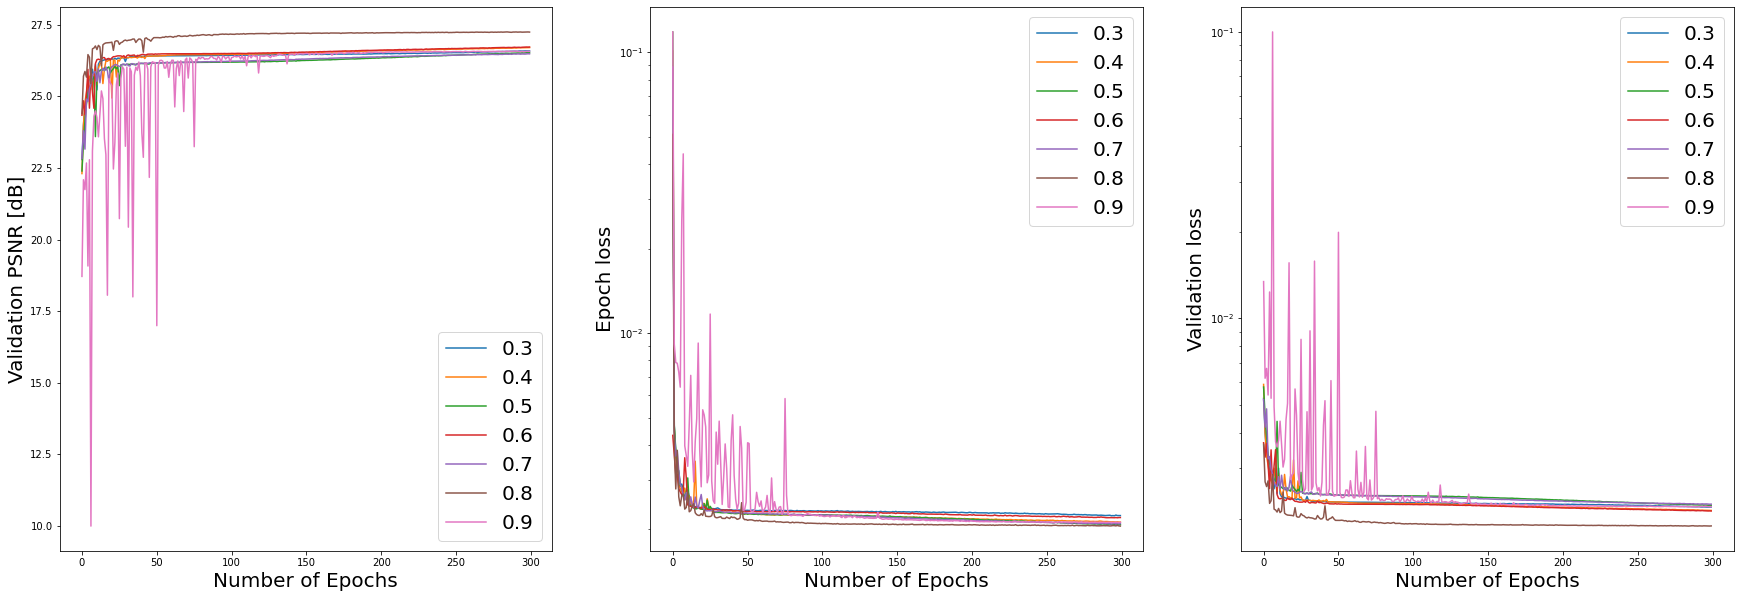

<Figure size 2160x720 with 0 Axes>

In [30]:
create_plots('factor')

### Learning rate patience

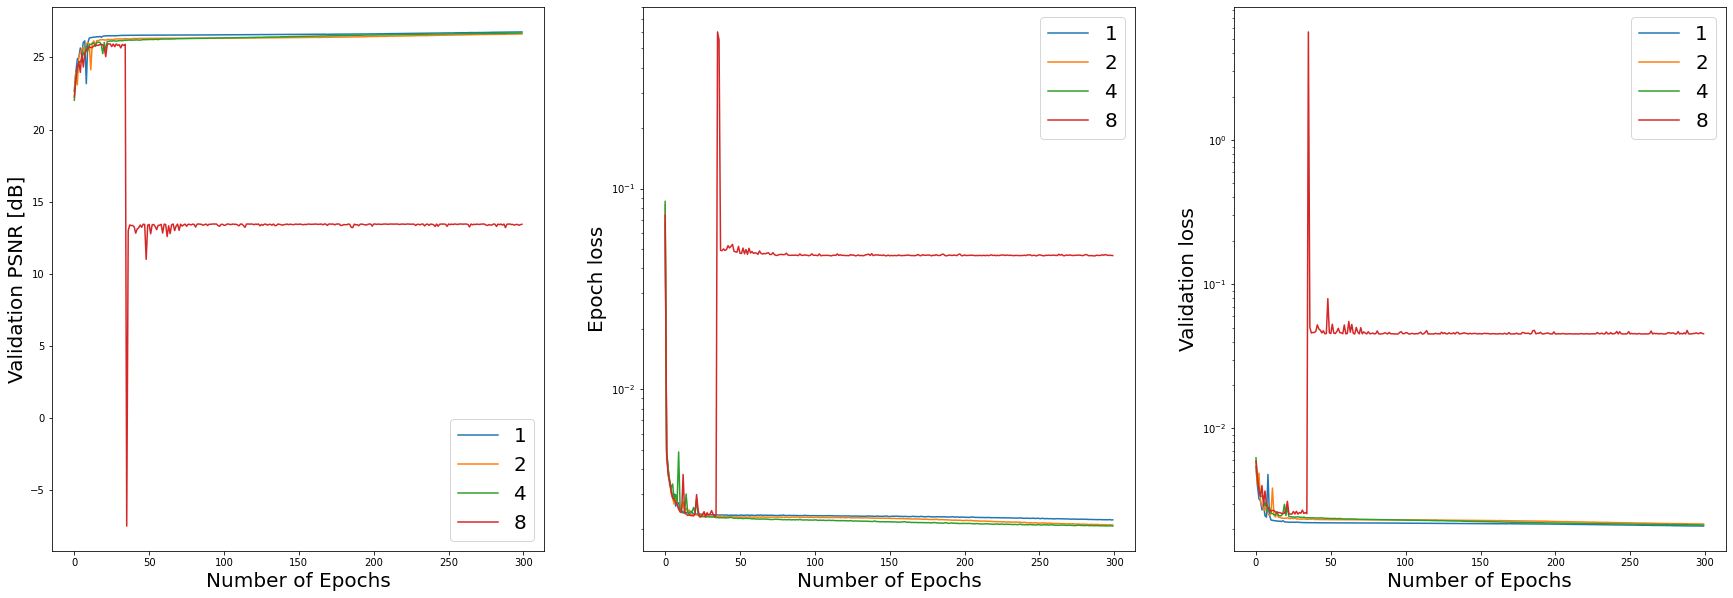

<Figure size 2160x720 with 0 Axes>

In [31]:
create_plots('patience')

### Ratio Training set / Validation set

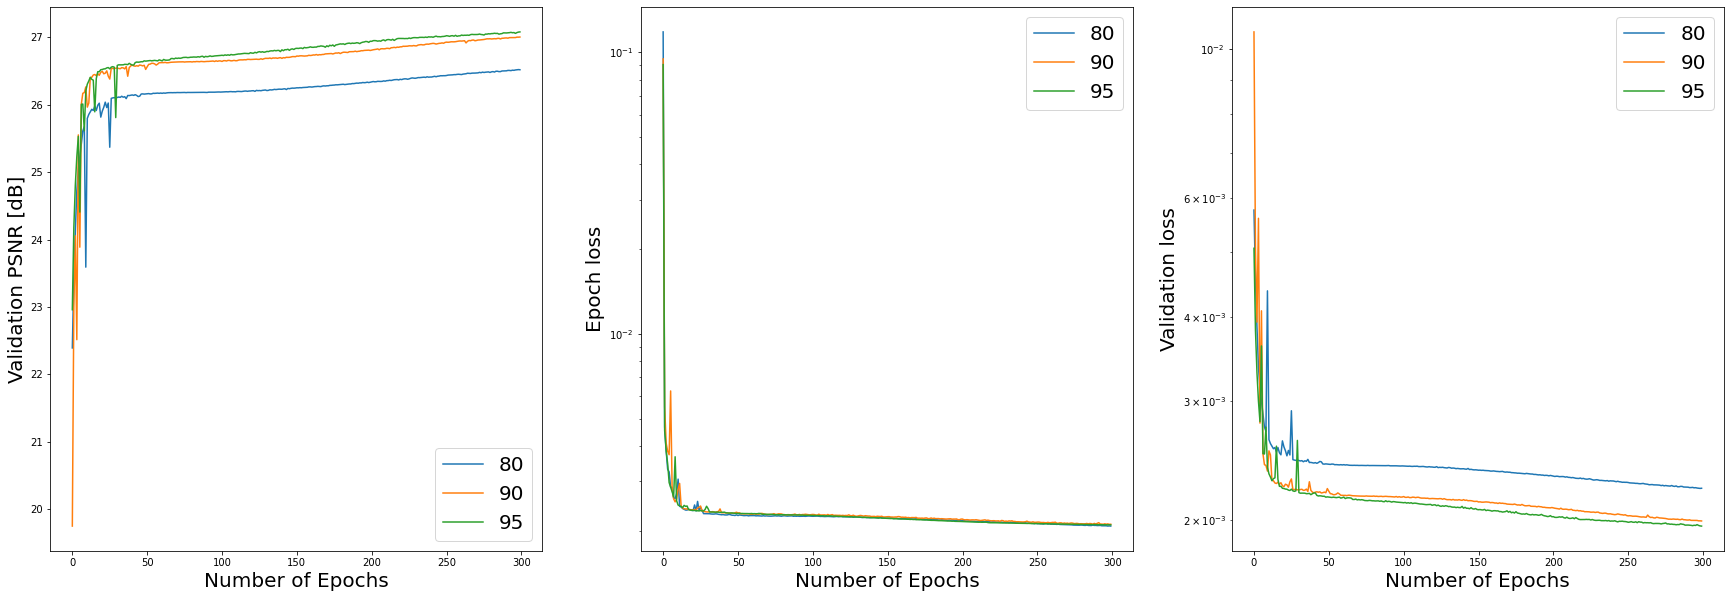

<Figure size 2160x720 with 0 Axes>

In [34]:
create_plots('ratio')